**11Ïû• ‚Äì Ïã¨Ï∏µ Ïã†Í≤ΩÎßù ÌõàÎ†®ÌïòÍ∏∞**

_Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏóêÎäî 11Ïû•Ïùò Î™®Îì† ÏÉòÌîå ÏΩîÎìúÏôÄ Ïó∞Ïäµ Î¨∏Ï†úÏóê ÎåÄÌïú ÏÜîÎ£®ÏÖòÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/11_training_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# 11.0 ÏÑ§Ï†ï

Ïù¥ ÌîÑÎ°úÏ†ùÌä∏ÏóêÎäî ÌååÏù¥Ïç¨ 3.7 Ïù¥ÏÉÅÏù¥ ÌïÑÏöîÌï©ÎãàÎã§:

In [2]:
import sys

assert sys.version_info >= (3, 7)

Í∑∏Î¶¨Í≥† ÌÖêÏÑúÌîåÎ°ú ‚â• 2.8:

In [4]:
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

Ïù¥Ï†Ñ Ïû•ÏóêÏÑúÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Í∏∞Î≥∏ Í∏ÄÍº¥ ÌÅ¨Í∏∞Î•º Ï†ïÏùòÌïòÏó¨ Í∑∏Î¶ºÏùÑ Îçî ÏòàÏÅòÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# ÏΩîÎû©Ïùò Í≤ΩÏö∞ ÎÇòÎàî Ìè∞Ìä∏Î•º ÏÑ§ÏπòÌï©ÎãàÎã§.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# ÎÇòÎàî Ìè∞Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


Í∑∏Î¶¨Í≥† `images/deep` Ìè¥ÎçîÎ•º ÎßåÎì§Í≥†(ÏïÑÏßÅ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞), Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ ÌÜµÌï¥ Ï±ÖÏóê ÏÇ¨Ïö©Ìï† Í∑∏Î¶ºÏùÑ Í≥†Ìï¥ÏÉÅÎèÑÎ°ú Ï†ÄÏû•ÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎäî `save_fig()` Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§:

In [6]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "deep"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 11.1 Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ ÏÜåÏã§Í≥º Ìè≠Ï£º Î¨∏Ï†ú

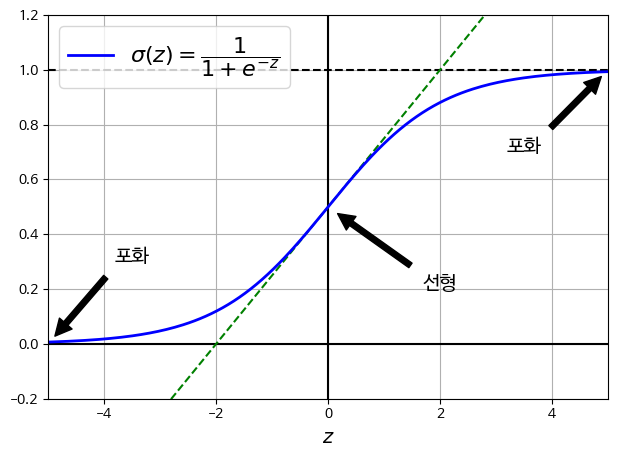

In [7]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 11-1ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Ìè¨Ìôî', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Ìè¨Ìôî', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('ÏÑ†Ìòï', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

save_fig("sigmoid_saturation_plot")
plt.show()

## 11.1.1 Xavier Ï¥àÍ∏∞ÌôîÏôÄ He Ï¥àÍ∏∞Ìôî

In [8]:
dense = tf.keras.layers.Dense(50, activation="relu",
                              kernel_initializer="he_normal")

In [9]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                                    distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid",
                              kernel_initializer=he_avg_init)

## 11.1.2 ÏàòÎ†¥ÌïòÏßÄ ÏïäÎäî ÌôúÏÑ±Ìôî Ìï®Ïàò

### LeakyReLU

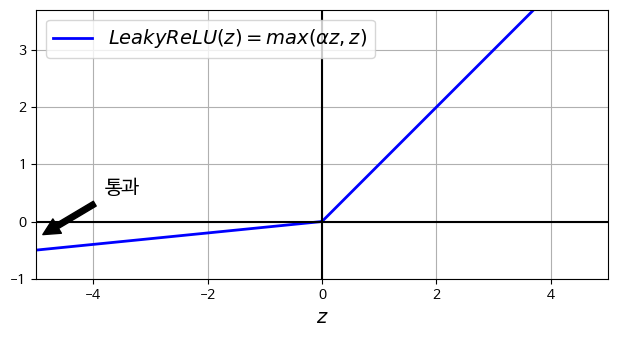

In [10]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 11-2Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('ÌÜµÍ≥º', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

save_fig("leaky_relu_plot")
plt.show()

In [11]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)  # Í∏∞Î≥∏Í∞í alpha=0.3
dense = tf.keras.layers.Dense(50, activation=leaky_relu,
                              kernel_initializer="he_normal")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [12]:
model = tf.keras.models.Sequential([
    # [...]  # Îã§Î•∏ Ï∏µ
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"),  # ÌôúÏÑ±Ìôî Ìï®Ïàò ÏóÜÏùå
    tf.keras.layers.LeakyReLU(alpha=0.2),  # Î≥ÑÎèÑÏùò Ï∏µÏúºÎ°ú ÌôúÏÑ±Ìôî Ìï®Ïàò Ï∂îÍ∞Ä
    # [...]  # Îã§Î•∏ Ï∏µ
])

### ELU

ÌÖêÏÑúÌîåÎ°úÏóêÏÑú ELUÎ•º Íµ¨ÌòÑÌïòÎäî Í≤ÉÏùÄ Í∞ÑÎã®Ìï©ÎãàÎã§. Ï∏µÏùÑ ÎßåÎì§ Îïå ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏßÄÏ†ïÌïòÍ≥† He Ï¥àÍ∏∞ÌôîÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞Îßå ÌïòÎ©¥ Îê©ÎãàÎã§:

In [13]:
dense = tf.keras.layers.Dense(50, activation="elu",
                              kernel_initializer="he_normal")

### SELU

Í∏∞Î≥∏Ï†ÅÏúºÎ°ú SELU ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(`scale` Î∞è `alpha`)Îäî Í∞Å Îâ¥Îü∞Ïùò ÌèâÍ∑† Ï∂úÎ†•Ïù¥ 0, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 1Ïóê Í∞ÄÍπùÍ≤å Ïú†ÏßÄÎêòÎèÑÎ°ù ÌäúÎãùÎê©ÎãàÎã§(Ï±ÖÏóêÏÑú ÏÑ§Î™ÖÌïú ÎåÄÎ°ú ÏûÖÎ†•ÎèÑ ÌèâÍ∑† 0Í≥º ÌëúÏ§ÄÌé∏Ï∞® 1Î°ú ÌëúÏ§ÄÌôîÎêòÍ≥† Îã§Î•∏ Ï†úÏïΩ Ï°∞Í±¥Ïù¥ Ï§ÄÏàòÎêúÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§). Ïù¥ ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ 1,000Í∞ú Ï∏µÏùÑ Í∞ÄÏßÑ Ïã¨Ï∏µ Ïã†Í≤ΩÎßùÏóêÏÑúÎèÑ Î™®Îì† Ï∏µÏóêÏÑú ÎåÄÎûµ ÌèâÍ∑† 0Í≥º ÌëúÏ§ÄÌé∏Ï∞® 1ÏùÑ Ïú†ÏßÄÌïòÏó¨ Í∏∞Ïö∏Í∏∞Í∞Ä Ìè≠Ï£º/ÏÜåÎ©∏ÌïòÎäî Î¨∏Ï†úÎ•º ÌîºÌï† Ïàò ÏûàÏäµÎãàÎã§:

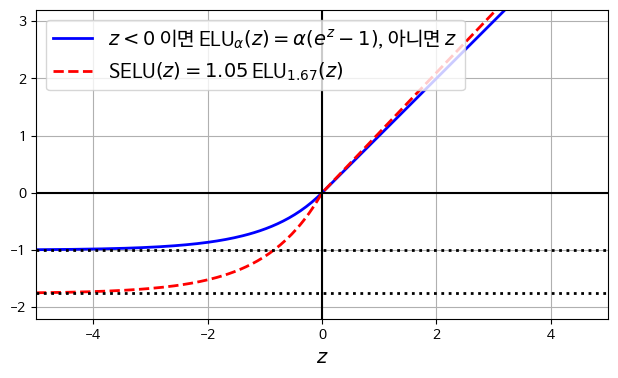

In [14]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 11-3ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

from scipy.special import erfc

# ÌèâÍ∑† 0, ÌëúÏ§Ä Ìé∏Ï∞® 1Î°ú ÏûêÏ≤¥ Ï†ïÍ∑úÌôîÌïòÍ∏∞ ÏúÑÌïú alpha Î∞è sacle
# (ÎÖºÎ¨∏Ïóê ÏûàÎäî Ïãù 14 Ï∞∏Ï°∞):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"$z < 0$ Ïù¥Î©¥ ELU$_\alpha(z) = \alpha (e^z - 1)$, ÏïÑÎãàÎ©¥ $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

save_fig("elu_selu_plot")
plt.show()

SELU ÏÇ¨Ïö©Î≤ïÏùÄ Í∞ÑÎã®Ìï©ÎãàÎã§:

In [15]:
dense = tf.keras.layers.Dense(50, activation="selu",
                              kernel_initializer="lecun_normal")

**Ï∂îÍ∞Ä ÏûêÎ£å - SELUÎ•º ÏÇ¨Ïö©Ìïú ÏûêÍ∏∞ Ï†ïÍ∑úÌôîÎêú ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÏòàÏãú**

SELU ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ 100Í∞úÏùò ÏùÄÎãâÏ∏µÏù¥ ÏûàÎäî Ìå®ÏÖò MNISTÏö© Ïã†Í≤ΩÎßùÏùÑ ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [16]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

Ïù¥Ï†ú ÌõàÎ†®Ìï¥ Î¥ÖÏãúÎã§. ÏûÖÎ†•Í∞íÏùÑ ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1Î°ú Ïä§ÏºÄÏùºÎßÅÌïòÎäî Í≤ÉÏùÑ ÏûäÏßÄ ÎßàÏÑ∏Ïöî:

In [18]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

29515/29515 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
26421880/26421880 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 0us/step
5148/5148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
4422102/4422102 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step


In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 9ms/step - accuracy: 0.4476 - loss: 1.5039 - val_accuracy: 0.7604 - val_loss: 0.6971
Epoch 2/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 7ms/step - accuracy: 0.7500 - loss: 0.7055 - val_accuracy: 0.8024 - val_loss: 0.6016
Epoch 3/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 7ms/step - accuracy: 0.8020 - loss: 0.5820 - val_accuracy: 0.8136 - val_loss: 0.5506
Epoch 4/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 9ms/step - accuracy: 0.8231 - loss: 0.5152 - val_accuracy: 0.8222 - val_loss: 0.5121
Epoch 5/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 7ms/step - accuracy: 0.8326 - loss: 0.4859 - val_accuracy: 0.8290 - val_loss: 0.4998


Ïã†Í≤ΩÎßùÏù¥ Îß§Ïö∞ ÍπäÏùÄÎç∞ÎèÑ ÌïôÏäµÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§. Ïù¥Ï†ú ReLU ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÎåÄÏã† ÏÇ¨Ïö©ÌïòÎ©¥ Ïñ¥Îñ§ ÏùºÏù¥ Î∞úÏÉùÌïòÎäîÏßÄ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§:

In [22]:
tf.random.set_seed(42)

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [25]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 11ms/step - accuracy: 0.1921 - loss: 2.0686 - val_accuracy: 0.3082 - val_loss: 1.7079
Epoch 2/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 7ms/step - accuracy: 0.3708 - loss: 1.4596 - val_accuracy: 0.4538 - val_loss: 1.2355
Epoch 3/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 7ms/step - accuracy: 0.5148 - loss: 1.1629 - val_accuracy: 0.6124 - val_loss: 1.0441
Epoch 4/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 7ms/step - accuracy: 0.6156 - loss: 0.9469 - val_accuracy: 0.6982 - val_loss: 0.8340
Epoch 5/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 7ms/step - accuracy: 0.6808 - loss: 0.8329 - val_accuracy: 0.6694 - val_loss: 0.8889


Ï¢ãÏßÄ ÏïäÎÑ§Ïöî. Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ ÏÜåÎ©∏/Ìè≠Ï£º Î¨∏Ï†úÎ°ú Ïù∏Ìï¥ Ïñ¥Î†§ÏõÄÏùÑ Í≤™ÏäµÎãàÎã§.

### GELU, Swish, Mish

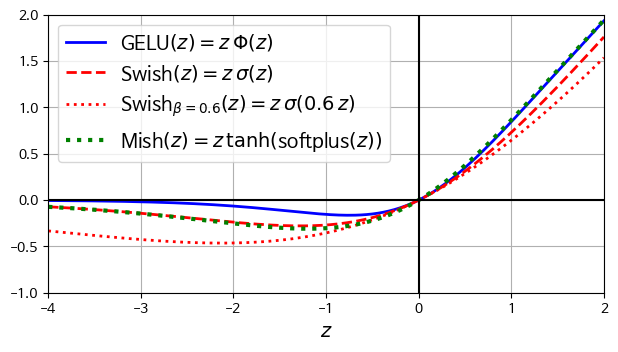

In [26]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 11-4Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

def swish(z, beta=1):
    return z * sigmoid(beta * z)

def approx_gelu(z):
    return swish(z, beta=1.702)

def softplus(z):
    return np.log(1 + np.exp(z))

def mish(z):
    return z * np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

save_fig("gelu_swish_mish_plot")
plt.show()

## 11.1.3 Î∞∞Ïπò Ï†ïÍ∑úÌôî

In [27]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥Î¶Ñ Ïπ¥Ïö¥ÌÑ∞Î•º ÏßÄÏö∞Í≥† ÎûúÎç§ ÏãúÎìúÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [28]:
# slide 19...
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten (Flatten)                    ‚îÇ (None, 784)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization                  ‚îÇ (None, 784)                 ‚îÇ           3,136 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 300)                 ‚îÇ         235,500 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1                ‚îÇ (None, 300)                 ‚îÇ           1,200 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 100)                 ‚îÇ          30,100 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2                ‚îÇ (None, 100)                 ‚îÇ             400 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                      ‚îÇ (None, 10)                  ‚îÇ           1,010 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [30]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [31]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏Ïù¥ ÏûëÎèôÌïúÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï£ºÍ∏∞Îßå ÌïòÎ©¥ Îê©ÎãàÎã§! üòä
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 4ms/step - accuracy: 0.7514 - loss: 0.7232 - val_accuracy: 0.8506 - val_loss: 0.3951
Epoch 2/2
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8553 - loss: 0.4131 - val_accuracy: 0.8642 - val_loss: 0.3621


ÎïåÎïåÎ°ú ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÑÏóê BNÏùÑ Ï†ÅÏö©ÌïòÎäî Í≤ÉÏù¥ Îçî Ìö®Í≥ºÏ†ÅÏùº Ïàò ÏûàÏäµÎãàÎã§(Ïù¥ Ï£ºÏ†úÏóê ÎåÄÌïú ÎÖºÏüÅÏù¥ ÏûàÏäµÎãàÎã§). ÎòêÌïú, `BatchNormalization` ÏïûÏùò Ï∏µÏóêÎäî Ìé∏Ìñ• Ìï≠Ïù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÏäµÎãàÎã§. Îî∞ÎùºÏÑú Ìé∏Ìñ•Ïù¥ ÏûàÏúºÎ©¥ ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÎÇ≠ÎπÑÎê† Ïàò ÏûàÏúºÎØÄÎ°ú Ï∏µÏùÑ ÏÉùÏÑ±Ìï† Îïå `use_bias=False`Î°ú ÏßÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§:

In [32]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥Î¶Ñ Ïπ¥Ïö¥ÌÑ∞Î•º ÏßÄÏö∞Í≥† Î¨¥ÏûëÏúÑ ÏãúÎìúÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [33]:
# slide 22...
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [35]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏Ïù¥ ÏûëÎèôÌïúÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï£ºÍ∏∞Îßå ÌïòÎ©¥ Îê©ÎãàÎã§! üòä
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 4ms/step - accuracy: 0.7409 - loss: 0.8222 - val_accuracy: 0.8502 - val_loss: 0.4321
Epoch 2/2
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8493 - loss: 0.4415 - val_accuracy: 0.8644 - val_loss: 0.3880


## 11.1.4 Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ ÌÅ¥Î¶¨Ìïë

Î™®Îì† `tf.keras.optimizers`Îäî `clipnorm` ÎòêÎäî `clipvalue` Îß§Í∞úÎ≥ÄÏàòÎ•º Î∞õÏäµÎãàÎã§:

In [36]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [37]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

# 11.2 ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Ï∏µ Ïû¨ÏÇ¨Ïö©

### ÏºÄÎùºÏä§ Î™®Îç∏ Ïû¨ÏÇ¨Ïö©

Ìå®ÏÖò MNIST ÌõàÎ†® ÏßëÌï©ÏùÑ Îëê Í∞úÎ°ú ÎÇòÎà† Î≥¥Í≤†ÏäµÎãàÎã§:
* `X_train_A`: T-shirts/topsÏôÄ pulloversÎ•º Ï†úÏô∏Ìïú Î™®Îì† Ìï≠Î™©Ïùò Î™®Îì† Ïù¥ÎØ∏ÏßÄ (ÌÅ¥ÎûòÏä§ 0Í≥º 2).
* `X_train_B`: T-shirts/topsÏôÄ pullovers Ï§ëÏóêÏÑú Ï≤òÏùå 200Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ°úÎßå Íµ¨ÏÑ±Îêú Ìõ®Ïî¨ ÏûëÏùÄ ÌõàÎ†® ÏÑ∏Ìä∏.

Í≤ÄÏ¶ù ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÎèÑ Ïù¥Îü¨Ìïú Î∞©ÏãùÏúºÎ°ú Î∂ÑÌï†ÎêòÏßÄÎßå Ïù¥ÎØ∏ÏßÄ ÏàòÏóêÎäî Ï†úÌïúÏù¥ ÏóÜÏäµÎãàÎã§.

ÏßëÌï© A(8Í∞úÏùò ÌÅ¥ÎûòÏä§Í∞Ä ÏûàÎäî Î∂ÑÎ•ò ÏûëÏóÖ)Ïóê ÎåÄÌï¥ Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥†, Ïù¥Î•º Îã§Ïãú ÏßëÌï© B(Ïù¥ÏßÑ Î∂ÑÎ•ò)Î•º Ï≤òÎ¶¨ÌïòÎäî Îç∞ ÏÇ¨Ïö©ÌïòÎ†§Í≥† Ìï©ÎãàÎã§. ÏßëÌï© AÏùò ÌÅ¥ÎûòÏä§(trousers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots)Îäî ÏßëÌï© BÏùò ÌÅ¥ÎûòÏä§(T-shirts/tops, pullovers)Í≥º Îã§ÏÜå Ïú†ÏÇ¨ÌïòÎØÄÎ°ú, ÏûëÏóÖ AÏóêÏÑú ÏûëÏóÖ BÎ°ú ÏïΩÍ∞ÑÏùò ÏßÄÏãùÏù¥ Ï†ÑÏù¥ÎêòÍ∏∞Î•º Ìù¨ÎßùÌï©ÎãàÎã§.

Í∑∏Îü¨ÎÇò `Dense` Ï∏µÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ôÏùÄ ÏúÑÏπòÏóêÏÑú Î∞úÏÉùÌïòÎäî Ìå®ÌÑ¥Îßå Ïû¨ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§(ÌïòÏßÄÎßå 14Ïû•ÏóêÏÑú ÏÇ¥Ìé¥Î≥º Ìï©ÏÑ±Í≥± Ï∏µÏùÄ ÌïôÏäµÎêú Ìå®ÌÑ¥ÏùÑ Ïù¥ÎØ∏ÏßÄÏùò Ïñ¥Îäê ÏúÑÏπòÏóêÏÑúÎÇò Í∞êÏßÄÌï† Ïàò ÏûàÏäµÎãàÎã§).

In [39]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ìå®ÏÖò MNISTÎ•º ÏûëÏóÖ AÏôÄ BÎ°ú Î∂ÑÌï†Ìïú Îã§Ïùå Î™®Îç∏ AÎ•º ÌïôÏäµÌïòÍ≥† "my_model_A"Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.

pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # AÏóê ÎåÄÌïú ÌÅ¥ÎûòÏä§ ID Ïû¨Ï†ïÏùò
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A.keras")

Epoch 1/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 3ms/step - accuracy: 0.4549 - loss: 1.6685 - val_accuracy: 0.7714 - val_loss: 0.7287
Epoch 2/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.7827 - loss: 0.6698 - val_accuracy: 0.8320 - val_loss: 0.5256
Epoch 3/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8378 - loss: 0.5093 - val_accuracy: 0.8538 - val_loss: 0.4467
Epoch 4/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.8587 - loss: 0.4375 - val_accuracy: 0.8624 - val_loss: 0.4043
Epoch 5/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8686 - loss: 0.3967 - val_accuracy: 0.8679 - val_loss: 0.3779
Epoch 6/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.8759 - loss: 0.3698 - val_accuracy: 0.8732

In [40]:
# extra code ‚Äì train and evaluate model B, without reusing model A

tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_B.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 251ms/step - accuracy: 0.5719 - loss: 0.7034 - val_accuracy: 0.5282 - val_loss: 0.6895
Epoch 2/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 31ms/step - accuracy: 0.5719 - loss: 0.6669 - val_accuracy: 0.5500 - val_loss: 0.6565
Epoch 3/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step - accuracy: 0.5983 - loss: 0.6357 - val_accuracy: 0.6014 - val_loss: 0.6285
Epoch 4/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step - accuracy: 0.6472 - loss: 0.6096 - val_accuracy: 0.6756 - val_loss: 0.6049
Epoch 5/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - accuracy: 0.7195 - loss: 0.5874 - val_accuracy: 0.7478 - val_loss: 0.5845
Epoch 6/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - accuracy: 0.7786 - loss: 0.5678 - val_accuracy: 0.8160 - val_loss: 0.5668
Epoch 7/2

[0.43860673904418945, 0.9294999837875366]

Î™®Îç∏ BÎäî ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú 91.85%Ïùò Ï†ïÌôïÎèÑÏóê ÎèÑÎã¨ÌñàÏäµÎãàÎã§. Ïù¥Ï†ú ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Î™®Îç∏ AÎ•º Ïû¨ÏÇ¨Ïö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [42]:
model_A = tf.keras.models.load_model("my_model_A.keras")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

`model_B_on_A`ÏôÄ `model_A`Îäî Ï∏µÏùÑ Ïã§Ï†ú Í≥µÏú†ÌïòÎØÄÎ°ú ÌïòÎÇòÎ•º ÌõàÎ†®ÌïòÎ©¥ Îëê Î™®Îç∏Ïù¥ Î™®Îëê ÏóÖÎç∞Ïù¥Ìä∏Îê©ÎãàÎã§. Ïù¥Î•º Î∞©ÏßÄÌïòÎ†§Î©¥ `model_A`Ïùò *Î≥µÏ†úÌïòÏó¨* `model_B_on_A`Î•º ÎßåÎì§Ïñ¥Ïïº Ìï©ÎãàÎã§:

In [43]:
tf.random.set_seed(42)  # Ï∂îÍ∞Ä ÏΩîÎìú - Ïû¨ÌòÑÏÑ± Î≥¥Ïû•

In [44]:
# slide 29...
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [45]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥Ï†Ñ ÏÖÄÏóêÏÑúÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú model_B_on_AÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [46]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])

In [47]:
# slide 30...
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data = (X_valid_B, y_valid_B))

Epoch 1/16
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 154ms/step - accuracy: 0.4551 - loss: 1.0447 - val_accuracy: 0.5262 - val_loss: 0.7472
Epoch 2/16
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - accuracy: 0.5321 - loss: 0.7287 - val_accuracy: 0.5955 - val_loss: 0.6451
Epoch 3/16
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - accuracy: 0.6312 - loss: 0.6369 - val_accuracy: 0.6528 - val_loss: 0.6173
Epoch 4/16
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - accuracy: 0.6706 - loss: 0.6088 - val_accuracy: 0.6696 - val_loss: 0.6045
Epoch 5/16
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - accuracy: 0.6653 - loss: 0.5946 - val_accuracy: 0.6944 - val_loss: 0.5949
Epoch 6/16
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step - accuracy: 0.6844 - loss: 0.5841 - val_accuracy: 0.7052 - val_loss: 0.5863
Epoch 7/1

Í∑∏Î†áÎã§Î©¥ ÏµúÏ¢Ö ÌåêÍ≤∞ÏùÄ Ïñ¥ÎñªÍ≤å ÎêòÎÇòÏöî?

In [48]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.7896 - loss: 0.5099


[0.5112247467041016, 0.7904999852180481]

ÌõåÎ•≠Ìï©ÎãàÎã§! Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÍ∞Ä 91.85%ÏóêÏÑú 93.85%Î°ú 2% Ìè¨Ïù∏Ìä∏ ÏÉÅÏäπÌñàÏäµÎãàÎã§. Ïù¥Îäî Ïò§Î•òÏú®Ïù¥ Í±∞Ïùò 25% Í∞êÏÜåÌñàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§:

In [49]:
1 - (100 - 93.85) / (100 - 91.85)

0.24539877300613477

# 11.3 Í≥†Í∏â ÏòµÌã∞ÎßàÏù¥Ï†Ä

In [50]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ìå®ÏÖò MNISTÏóêÏÑú ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º ÌÖåÏä§Ìä∏ÌïòÎäî Í∞ÑÎã®Ìïú Ìï®Ïàò

def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [51]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [52]:
history_sgd = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.6680 - loss: 0.9818 - val_accuracy: 0.8124 - val_loss: 0.5146
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8305 - loss: 0.4888 - val_accuracy: 0.8334 - val_loss: 0.4577
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8497 - loss: 0.4365 - val_accuracy: 0.8438 - val_loss: 0.4290
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8587 - loss: 0.4056 - val_accuracy: 0.8538 - val_loss: 0.4012
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8652 - loss: 0.3837 - val_accuracy: 0.8522 - val_loss: 0.3917
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8698 - loss: 0.3666 - val_accuracy: 0.8592

## 11.3.1 Î™®Î©òÌÖÄ ÏµúÏ†ÅÌôî

In [53]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [54]:
history_momentum = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.6677 - loss: 1.0199 - val_accuracy: 0.8100 - val_loss: 0.5242
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8223 - loss: 0.5022 - val_accuracy: 0.8262 - val_loss: 0.4754
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8423 - loss: 0.4447 - val_accuracy: 0.8386 - val_loss: 0.4389
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8552 - loss: 0.4109 - val_accuracy: 0.8464 - val_loss: 0.4162
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8626 - loss: 0.3866 - val_accuracy: 0.8532 - val_loss: 0.3980
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8682 - loss: 0.3685 - val_accuracy: 0.8566

## 11.3.2 ÎÑ§Ïä§ÌÖåÎ°úÌîÑ Í∞ÄÏÜç Í≤ΩÏÇ¨

In [55]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [56]:
history_nesterov = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.6657 - loss: 1.0088 - val_accuracy: 0.8244 - val_loss: 0.4894
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 2ms/step - accuracy: 0.8338 - loss: 0.4759 - val_accuracy: 0.8424 - val_loss: 0.4336
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8512 - loss: 0.4238 - val_accuracy: 0.8504 - val_loss: 0.4079
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8617 - loss: 0.3951 - val_accuracy: 0.8522 - val_loss: 0.3908
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8679 - loss: 0.3745 - val_accuracy: 0.8574 - val_loss: 0.3784
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8736 - loss: 0.3585 - val_accuracy: 0.8642

## 11.3.3 AdaGrad

In [57]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [58]:
history_adagrad = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.5590 - loss: 1.4530 - val_accuracy: 0.7712 - val_loss: 0.7097
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.7748 - loss: 0.6924 - val_accuracy: 0.8030 - val_loss: 0.5947
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8032 - loss: 0.5974 - val_accuracy: 0.8144 - val_loss: 0.5457
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8178 - loss: 0.5518 - val_accuracy: 0.8228 - val_loss: 0.5167
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8270 - loss: 0.5233 - val_accuracy: 0.8282 - val_loss: 0.4972
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8321 - loss: 0.5034 - val_accuracy: 0.8324

## 11.3.4 RMSProp

In [59]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [60]:
history_rmsprop = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.7581 - loss: 0.6694 - val_accuracy: 0.8326 - val_loss: 0.4260
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.8544 - loss: 0.4032 - val_accuracy: 0.8520 - val_loss: 0.3874
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8694 - loss: 0.3683 - val_accuracy: 0.8536 - val_loss: 0.4116
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8743 - loss: 0.3552 - val_accuracy: 0.8410 - val_loss: 0.4567
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8795 - loss: 0.3446 - val_accuracy: 0.8398 - val_loss: 0.5203
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8823 - loss: 0.3382 - val_accuracy: 0.8584

## 11.3.5 Adam

In [61]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [62]:
history_adam = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.7681 - loss: 0.6484 - val_accuracy: 0.8250 - val_loss: 0.4359
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.8582 - loss: 0.3908 - val_accuracy: 0.8346 - val_loss: 0.4134
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8720 - loss: 0.3471 - val_accuracy: 0.8422 - val_loss: 0.4260
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8815 - loss: 0.3195 - val_accuracy: 0.8588 - val_loss: 0.3844
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8896 - loss: 0.3018 - val_accuracy: 0.8630 - val_loss: 0.3805
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8944 - loss: 0.2837 - val_accuracy: 0.8656

## 11.3.6 Adamax

In [63]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999)

In [64]:
history_adamax = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.7661 - loss: 0.6943 - val_accuracy: 0.8344 - val_loss: 0.4416
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8550 - loss: 0.4099 - val_accuracy: 0.8488 - val_loss: 0.4019
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8683 - loss: 0.3656 - val_accuracy: 0.8532 - val_loss: 0.3866
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8801 - loss: 0.3376 - val_accuracy: 0.8574 - val_loss: 0.3709
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8876 - loss: 0.3163 - val_accuracy: 0.8606 - val_loss: 0.3660
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8918 - loss: 0.3003 - val_accuracy: 0.8650

## 11.3.7 Nadam

In [65]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                      beta_2=0.999)

In [66]:
history_nadam = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.7797 - loss: 0.6225 - val_accuracy: 0.8528 - val_loss: 0.3950
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 2ms/step - accuracy: 0.8635 - loss: 0.3774 - val_accuracy: 0.8522 - val_loss: 0.4087
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8758 - loss: 0.3364 - val_accuracy: 0.8492 - val_loss: 0.4136
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8854 - loss: 0.3100 - val_accuracy: 0.8500 - val_loss: 0.4137
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.8924 - loss: 0.2905 - val_accuracy: 0.8626 - val_loss: 0.3783
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8958 - loss: 0.2749 - val_accuracy: 0.8606

## 11.3.8 AdamW

TF 1.12Î∂ÄÌÑ∞ `AdamW`Í∞Ä experimentalÏóêÏÑú Î≤óÏñ¥ÎÇ¨ÏäµÎãàÎã§.

In [67]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=0.001,
                                      beta_1=0.9, beta_2=0.999)

In [68]:
history_adamw = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.7705 - loss: 0.6498 - val_accuracy: 0.8300 - val_loss: 0.4361
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.8582 - loss: 0.3890 - val_accuracy: 0.8334 - val_loss: 0.4253
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8709 - loss: 0.3497 - val_accuracy: 0.8576 - val_loss: 0.3862
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8802 - loss: 0.3239 - val_accuracy: 0.8592 - val_loss: 0.3743
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8877 - loss: 0.3019 - val_accuracy: 0.8704 - val_loss: 0.3666
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8944 - loss: 0.2827 - val_accuracy: 0.8702

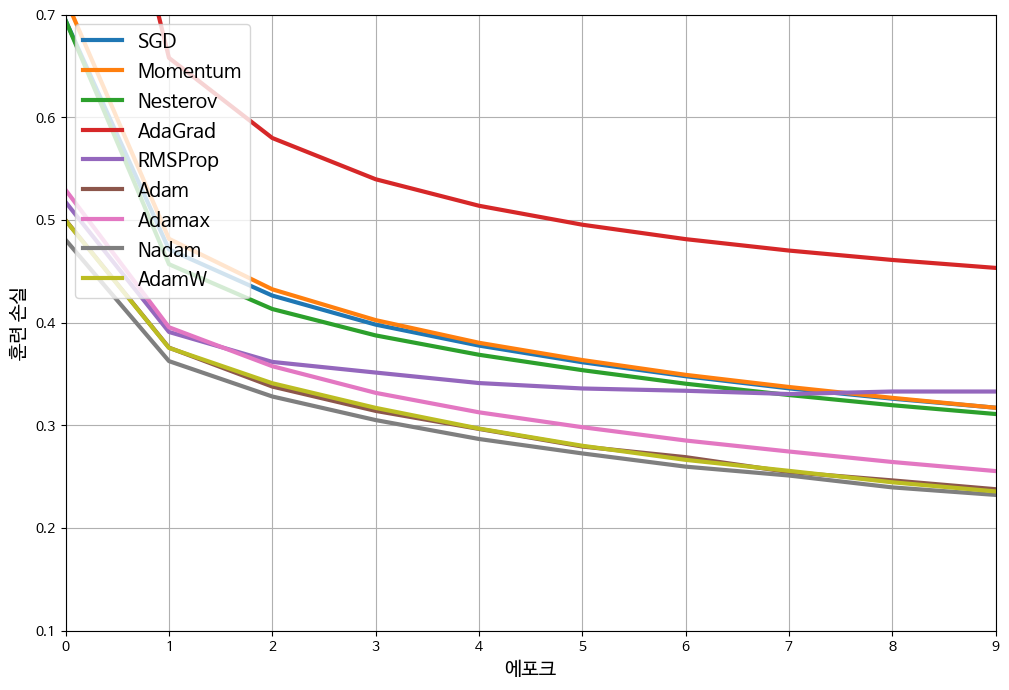

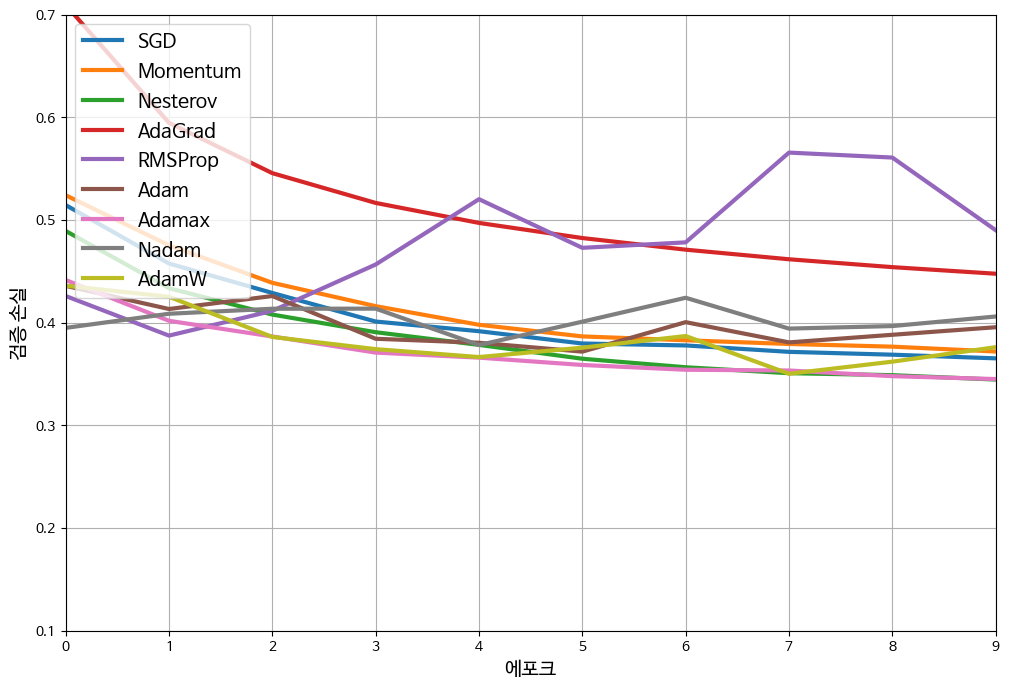

In [69]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îì† ÏòµÌã∞ÎßàÏù¥Ï†ÄÏùò ÌïôÏäµ Í≥°ÏÑ† ÏãúÍ∞ÅÌôî

for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("ÏóêÌè¨ÌÅ¨")
    plt.ylabel({"loss": "ÌõàÎ†® ÏÜêÏã§", "val_loss": "Í≤ÄÏ¶ù ÏÜêÏã§"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

## 11.3.9 ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎßÅ

### Í±∞Îì≠Ï†úÍ≥± Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅ

learning_rate = initial_learning_rate / (1 + step / decay_steps)**power

ÏºÄÎùºÏä§Îäî `power = 1`ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

**ÎÖ∏Ìä∏**: ÏòµÌã∞ÎßàÏù¥Ï†ÄÏùò `decay` Îß§Í∞úÎ≥ÄÏàòÎäî deprecated ÎêòÏóàÏäµÎãàÎã§. `decay` Îß§Í∞úÎ≥ÄÏàòÎ•º Í∞ÄÏßÑ Íµ¨Ìòï ÏòµÌã∞ÎßàÏù¥Ï†ÄÎäî `tf.keras.optimizers.legacy`Ïóê ÏïÑÏßÅ ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå Í∑∏ÎåÄÏã† `tf.keras.optimizers.schedules`Î•º ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§.

In [72]:
# DEPRECATED:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [73]:
# RECOMMENDED:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

`InverseTimeDecay` Ïä§ÏºÄÏ§ÑÎü¨Îäî `learning_rate = initial_learning_rate / (1 + decay_rate * step / decay_step)`Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. `staircase = True`Î°ú ÏßÄÏ†ïÌïòÎ©¥ `step / decay_steps`Î•º `floor(step / decay_step)`ÏúºÎ°ú Î∞îÍøâÎãàÎã§.

In [74]:
history_power_scheduling = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.6751 - loss: 0.9784 - val_accuracy: 0.8258 - val_loss: 0.4855
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8301 - loss: 0.4887 - val_accuracy: 0.8398 - val_loss: 0.4447
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8470 - loss: 0.4377 - val_accuracy: 0.8452 - val_loss: 0.4251
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8559 - loss: 0.4104 - val_accuracy: 0.8520 - val_loss: 0.4117
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8620 - loss: 0.3917 - val_accuracy: 0.8556 - val_loss: 0.4029
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8660 - loss: 0.3775 - val_accuracy: 0.8596

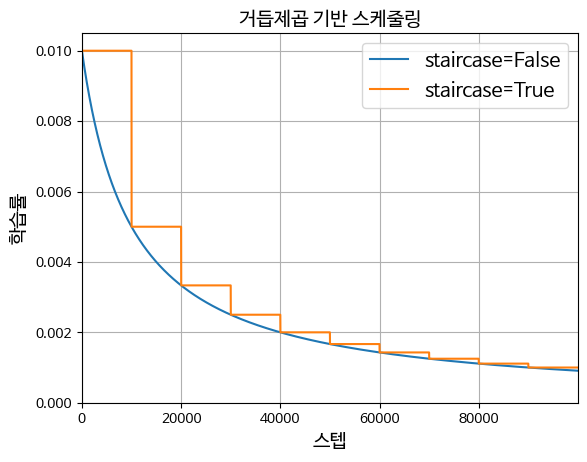

In [75]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í±∞Îì≠Ï†úÍ≥± Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅÏùÑ ÌëúÏãúÌï©ÎãàÎã§.

initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Ïä§ÌÖù")
plt.ylabel("ÌïôÏäµÎ•†")
plt.title("Í±∞Îì≠Ï†úÍ≥± Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅ", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### ÏßÄÏàò Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅ

```python
learning_rate = initial_learning_rate * decay_rate ** (step / decay_steps)
```

In [76]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20_000,
    decay_rate=0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [77]:
history_exponential_scheduling = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.6900 - loss: 0.9458 - val_accuracy: 0.8302 - val_loss: 0.4932
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8273 - loss: 0.4949 - val_accuracy: 0.8382 - val_loss: 0.4494
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8456 - loss: 0.4394 - val_accuracy: 0.8446 - val_loss: 0.4286
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8549 - loss: 0.4105 - val_accuracy: 0.8482 - val_loss: 0.4138
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8621 - loss: 0.3919 - val_accuracy: 0.8526 - val_loss: 0.4002
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8660 - loss: 0.3786 - val_accuracy: 0.8566

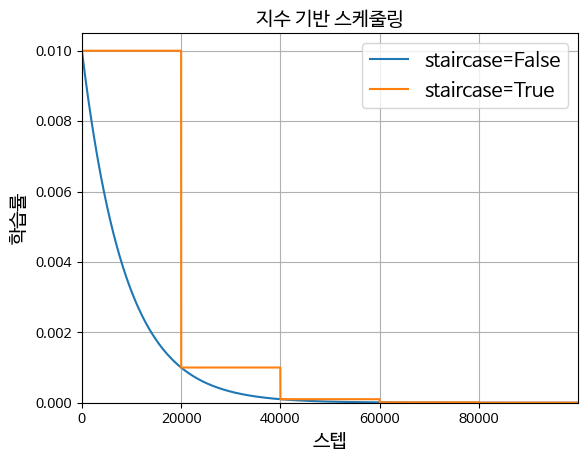

In [78]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ ÏßÄÏàò Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅÏùÑ ÌëúÏãúÌï©ÎãàÎã§.

initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Ïä§ÌÖù")
plt.ylabel("ÌïôÏäµÎ•†")
plt.title("ÏßÄÏàò Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅ", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

ÏºÄÎùºÏä§Îäî ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ïä§ÏºÄÏ§ÑÎßÅ Ìï®ÏàòÎ•º ÏúÑÌï¥ `LearningRateScheduler` ÏΩúÎ∞± ÌÅ¥ÎûòÏä§Î•º Ï†úÍ≥µÌï©ÎãàÎã§. Ïù¥Î•º ÏÇ¨Ïö©Ìï¥ ÏßÄÏàò Í∏∞Î∞ò Í∞êÏá†Î•º Íµ¨ÌòÑÌïòÎäî Î∞©Î≤ïÏùÑ ÏÇ¥Ìé¥ Î≥¥Í≤üÏäµÎãàÎã§. Ïó¨Í∏∞ÏóêÏÑúÎäî Ïä§ÌÖùÏù¥ ÏïÑÎãàÎùº ÏóêÌè¨ÌÅ¨ÎßàÎã§ ÌïôÏäµÎ•†Ïù¥ Î∞îÎÄùÎãàÎã§.

In [80]:
# slide 50...
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [85]:
# slide 50...
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
      return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [86]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ìå®ÏÖò MNISTÏö© Î™®Îç∏ ÎπåÎìú Î∞è Ïª¥ÌååÏùº

tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
n_epochs = 20

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/20
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.6782 - loss: 0.9579 - val_accuracy: 0.8312 - val_loss: 0.4832 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8289 - loss: 0.4843 - val_accuracy: 0.8386 - val_loss: 0.4426 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8464 - loss: 0.4324 - val_accuracy: 0.8468 - val_loss: 0.4229 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8560 - loss: 0.4035 - val_accuracy: 0.8528 - val_loss: 0.4089 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8630 - loss: 0.3837 - val_accuracy: 0.8532 - val_loss: 0.3983 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ‚îÅ‚îÅ‚îÅ

ÎòêÎäî Ïä§ÏºÄÏ§Ñ Ìï®ÏàòÍ∞Ä ÌòÑÏû¨ ÌïôÏäµÎ•†ÏùÑ Îëê Î≤àÏß∏ Ïù∏ÏàòÎ°ú Î∞õÏùÑ Ïàò ÏûàÏäµÎãàÎã§:

In [ ]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (1 / 20)

**Ï∂îÍ∞Ä ÏûêÎ£å**: Í∞Å ÏóêÌè¨ÌÅ¨Í∞Ä ÏïÑÎãå Í∞Å Î∞òÎ≥µÎßàÎã§ ÌïôÏäµÎ•†ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ïä§ÏºÄÏ§ÑÎßÅ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ†§Î©¥ ÏûêÏ≤¥ ÏΩúÎ∞± ÌÅ¥ÎûòÏä§Î•º ÏûëÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§:

In [88]:
K = tf.keras.backend

class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self, n_steps=40_000):
        super().__init__()
        self.n_steps = n_steps

    def on_batch_begin(self, batch, logs=None):
        # Ï∞∏Í≥†: `batch` Ïù∏ÏàòÎäî Í∞Å ÏóêÌè¨ÌÅ¨ÎßàÎã§ Ïû¨ÏÑ§Ï†ïÎê©ÎãàÎã§.
        lr = K.get_value(self.model.optimizer.learning_rate)
        new_learning_rate = lr * 0.1 ** (1 / self.n_steps)
        K.set_value(self.model.optimizer.learning_rate, new_learning_rate)

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

In [89]:
lr0 = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [92]:
import math

batch_size = 32
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25


AttributeError: 'str' object has no attribute 'name'

### Íµ¨Í∞ÑÎ≥Ñ Í≥†Ï†ï Ïä§ÏºÄÏ§ÑÎßÅ

In [93]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000, 80_000],
    values=[0.01, 0.005, 0.001]
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [94]:
history_piecewise_scheduling = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 3ms/step - accuracy: 0.6736 - loss: 0.9855 - val_accuracy: 0.8152 - val_loss: 0.5143
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8278 - loss: 0.4928 - val_accuracy: 0.8346 - val_loss: 0.4549
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8465 - loss: 0.4367 - val_accuracy: 0.8432 - val_loss: 0.4274
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8567 - loss: 0.4040 - val_accuracy: 0.8492 - val_loss: 0.4117
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8642 - loss: 0.3812 - val_accuracy: 0.8536 - val_loss: 0.3994
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8704 - loss: 0.3632 - val_accuracy: 0.8568

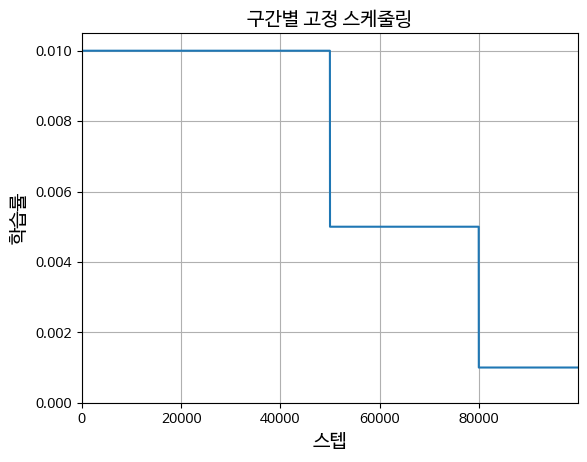

In [95]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Íµ¨Í∞ÑÎ≥Ñ Í≥†Ï†ï Ïä§ÏºÄÏ§ÑÎßÅÏùÑ ÌëúÏãúÌï©ÎãàÎã§.

boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Ïä§ÌÖù")
plt.ylabel("ÌïôÏäµÎ•†")
plt.title("Íµ¨Í∞ÑÎ≥Ñ Í≥†Ï†ï Ïä§ÏºÄÏ§ÑÎßÅ", fontsize=14)
plt.grid(True)
plt.show()

ÏßÄÏàò Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅÏóêÏÑú ÌñàÎçò Í≤ÉÏ≤òÎüº Íµ¨Í∞ÑÎ≥Ñ Í≥†Ï†ï Ïä§ÏºÄÏ§ÑÎßÅÏùÑ ÏàòÎèôÏúºÎ°ú Íµ¨ÌòÑÌï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§:

In [96]:
# slide 51...
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [97]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Íµ¨Í∞ÑÎ≥Ñ Í≥†Ï†ï Ïä§ÏºÄÏ§ÑÎßÅÏùÑ Ï†ïÏùòÌïòÎäî ÏùºÎ∞òÏ†ÅÏù∏ Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[(boundaries > epoch).argmax() - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [98]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥Ï†ÑÍ≥º Í∞ôÏù¥ tf.keras.callbacks.LearningRateSchedulerÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.

n_epochs = 25

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = build_model()
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.7563 - loss: 0.6835 - val_accuracy: 0.8336 - val_loss: 0.4465 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.8360 - loss: 0.4655 - val_accuracy: 0.8460 - val_loss: 0.4316 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8451 - loss: 0.4466 - val_accuracy: 0.8426 - val_loss: 0.4220 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8530 - loss: 0.4196 - val_accuracy: 0.8302 - val_loss: 0.4638 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8549 - loss: 0.4106 - val_accuracy: 0.8486 - val_loss: 0.4489 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ‚îÅ‚îÅ‚îÅ

ÏßÄÍ∏àÍπåÏßÄ `InverseTimeDecay`, `ExponentialDecay`, `PiecewiseConstantDecay`Î•º ÏÇ¥Ìé¥ Î≥¥ÏïòÏäµÎãàÎã§. `tf.keras.optimizers.schedules`ÏóêÎäî Ïù¥Ïô∏Ïóê Î™á Í∞úÏùò Ïä§ÏºÄÏ§ÑÎü¨Í∞Ä Îçî ÏûàÏäµÎãàÎã§. Ï†ÑÏ≤¥ Î¶¨Ïä§Ìä∏Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

In [99]:
for name in sorted(dir(tf.keras.optimizers.schedules)):
    if name[0] == name[0].lower():  # must start with capital letter
        continue
    scheduler_class = getattr(tf.keras.optimizers.schedules, name)
    print(f"‚Ä¢ {name} ‚Äì {scheduler_class.__doc__.splitlines()[0]}")

‚Ä¢ CosineDecay ‚Äì A `LearningRateSchedule` that uses a cosine decay with optional warmup.
‚Ä¢ CosineDecayRestarts ‚Äì A `LearningRateSchedule` that uses a cosine decay schedule with restarts.
‚Ä¢ ExponentialDecay ‚Äì A `LearningRateSchedule` that uses an exponential decay schedule.
‚Ä¢ InverseTimeDecay ‚Äì A `LearningRateSchedule` that uses an inverse time decay schedule.
‚Ä¢ LearningRateSchedule ‚Äì The learning rate schedule base class.
‚Ä¢ PiecewiseConstantDecay ‚Äì A `LearningRateSchedule` that uses a piecewise constant decay schedule.
‚Ä¢ PolynomialDecay ‚Äì A `LearningRateSchedule` that uses a polynomial decay schedule.


### ÏÑ±Îä• Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅ

In [100]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏ ÎπåÎìú Î∞è Ïª¥ÌååÏùº

model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [101]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 3ms/step - accuracy: 0.6808 - loss: 0.9474 - val_accuracy: 0.8246 - val_loss: 0.4953 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8306 - loss: 0.4865 - val_accuracy: 0.8362 - val_loss: 0.4520 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8478 - loss: 0.4300 - val_accuracy: 0.8460 - val_loss: 0.4232 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8572 - loss: 0.3985 - val_accuracy: 0.8490 - val_loss: 0.4103 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8647 - loss: 0.3764 - val_accuracy: 0.8552 - val_loss: 0.3976 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ‚îÅ‚îÅ‚îÅ

In [102]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ ÏÑ±Îä• Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅÏùÑ ÌëúÏãúÌï©ÎãàÎã§.

plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("ÏóêÌè¨ÌÅ¨")
plt.ylabel("ÌïôÏäµÎ•†", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Í≤ÄÏ¶ù ÏÜêÏã§', color='r')
ax2.tick_params('y', colors='r')

plt.title("ÌèâÌÉÑ ÏßÄÏó≠ÏóêÏÑú LR Í∞êÏÜåÌïòÍ∏∞", fontsize=14)
plt.show()

KeyError: 'lr'

### 1ÏÇ¨Ïù¥ÌÅ¥ Ïä§ÏºÄÏ§ÑÎßÅ

`ExponentialLearningRate` ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï ÏΩúÎ∞±ÏùÄ ÌõàÎ†®Ïùò Í∞Å Î∞∞ÏπòÍ∞Ä ÎÅùÎÇ† ÎïåÎßàÎã§ ÌïôÏäµÎ•†ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§. ÌïôÏäµÎ•†Ïóê ÏÉÅÏàò `factor`Î•º Í≥±Ìï©ÎãàÎã§. ÎòêÌïú Í∞Å Î∞∞ÏπòÏóêÏÑú ÌïôÏäµÎ•†Í≥º ÏÜêÏã§ÏùÑ Ï†ÄÏû•Ìï† Ïàò ÏûàÏäµÎãàÎã§. `logs["loss"]`Îäî Ïã§Ï†úÎ°ú ÏóêÌè¨ÌÅ¨ ÏãúÏûë Ïù¥ÌõÑÏùò ÌèâÍ∑† ÏÜêÏã§Ïù∏Îç∞ Ïö∞Î¶¨Îäî ÎåÄÏã† Î∞∞Ïπò ÏÜêÏã§ÏùÑ Ï†ÄÏû•ÌïòÍ≥† Ïã∂ÏäµÎãàÎã§. Îî∞ÎùºÏÑú ÏóêÌè¨ÌÅ¨ ÏãúÏûë Ïù¥ÌõÑ Î∞∞Ïπò ÌöüÏàòÏùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ ÏßÄÍ∏àÍπåÏßÄÏùò Ï¥ù ÏÜêÏã§ÏùÑ Íµ¨Ìïú Îã§Ïùå Ïù¥Ï†Ñ Î∞∞ÏπòÏùò Ï¥ù ÏÜêÏã§ÏùÑ ÎπºÏÑú ÌòÑÏû¨ Î∞∞ÏπòÏùò ÏÜêÏã§ÏùÑ Íµ¨Ìï¥Ïïº Ìï©ÎãàÎã§.

In [103]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # ÏßÄÍ∏àÍπåÏßÄÏùò ÌèâÍ∑† ÏÜêÏã§
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate * self.factor)

`find_learning_rate()` Ìï®ÏàòÎäî `ExponentialLearningRate` ÏΩúÎ∞±ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥† ÌïôÏäµÎ•†Í≥º Ìï¥Îãπ Î∞∞Ïπò ÏÜêÏã§ÏùÑ Î∞òÌôòÌï©ÎãàÎã§. ÎßàÏßÄÎßâÏóêÎäî Î™®Îç∏Í≥º Ìï¥Îãπ ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º Ï¥àÍ∏∞ ÏÉÅÌÉúÎ°ú Î≥µÏõêÌï©ÎãàÎã§.

In [104]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

`plot_lr_vs_loss()` Ìï®ÏàòÎäî ÌïôÏäµÎ•†Í≥º ÏÜêÏã§ÏùÑ ÌîåÎ°ØÌï©ÎãàÎã§. 1ÏÇ¨Ïù¥ÌÅ¥Ïùò ÏµúÎåÄ ÌïôÏäµÎ•†Î°ú ÏÇ¨Ïö©Ìï† ÏµúÏ†ÅÏùò ÌïôÏäµÎ•†ÏùÄ Í≥°ÏÑ†Ïùò Îß® ÏïÑÎûòÏóê ÏûàÏäµÎãàÎã§.

In [105]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("ÌïôÏäµÎ•†")
    plt.ylabel("ÏÜêÏã§")
    plt.grid()

Í∞ÑÎã®Ìïú Ìå®ÏÖò MNIST Î™®Îç∏ÏùÑ ÎπåÎìúÌïòÍ≥† Ïª¥ÌååÏùºÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [106]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

Ïù¥Ï†ú 1ÏÇ¨Ïù¥ÌÅ¥Ïóê ÎåÄÌïú ÏµúÏ†ÅÏùò ÏµúÎåÄ ÌïôÏäµÎ•†ÏùÑ Ï∞æÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§:

In [107]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

AttributeError: 'str' object has no attribute 'name'

1ÏÇ¨Ïù¥ÌÅ¥Ïóê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî ÏµúÎåÄ ÌïôÏäµÎ•†ÏùÄ 10<sup>-1</sup> Ï†ïÎèÑÏù∏ Í≤É Í∞ôÏäµÎãàÎã§.

`OneCycleScheduler` ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï ÏΩúÎ∞±ÏùÄ Í∞Å Î∞∞ÏπòÍ∞Ä ÏãúÏûëÎê† Îïå ÌïôÏäµÎ•†ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§. Ïù¥ Ï±ÖÏóê ÏÑ§Î™ÖÎêú ÎÖºÎ¶¨Î•º Ï†ÅÏö©Ìï©ÎãàÎã§. ÌõàÎ†®Ïùò ÏïΩ Ï†àÎ∞ò ÎèôÏïà ÌïôÏäµ ÏÜçÎèÑÎ•º ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÏãúÌÇ® Îã§Ïùå, Îã§Ïãú Ï¥àÍ∏∞ ÌïôÏäµ ÏÜçÎèÑÎ°ú ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Í∞êÏÜåÏãúÌÇ§Í≥†, ÎßàÏßÄÎßâÏúºÎ°ú ÌõàÎ†®Ïùò ÎßàÏßÄÎßâ Î∂ÄÎ∂ÑÏóêÏÑúÎäî ÌïôÏäµ ÏÜçÎèÑÎ•º ÏÑ†ÌòïÏ†ÅÏúºÎ°ú 0Ïóê Í∞ÄÍπùÍ≤å Í∞êÏÜåÏãúÌÇµÎãàÎã§.

In [108]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

Í∞ÑÎã®Ìïú Ìå®ÏÖò MNIST Î™®Îç∏ÏùÑ ÎπåÎìúÌïòÍ≥† Ïª¥ÌååÏùºÌïú Îã§Ïùå `OneCycleScheduler` ÏΩúÎ∞±ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†®Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [109]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs,
                             max_lr=0.1)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle])

Epoch 1/25


AttributeError: 'str' object has no attribute 'name'

# 11.4 Í∑úÏ†úÎ•º ÌÜµÌïú Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

## 11.4.1 $\ell_1$Í≥º $\ell_2$ Í∑úÏ†ú

In [110]:
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

ÎòêÎäî Í≥ÑÏàòÍ∞Ä 0.1Ïù∏ ‚Ñì<sub>1</sub> Ï†ïÍ∑úÌôîÏùò Í≤ΩÏö∞ `l1(0.1)`ÏùÑ ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò, Í≥ÑÏàòÍ∞Ä Í∞ÅÍ∞Å 0.1Í≥º 0.01Ïù∏ ‚Ñì<sub>1</sub> Î∞è ‚Ñì<sub>2</sub> Ï†ïÍ∑úÌôîÏùò Í≤ΩÏö∞ `l1_l2(0.1, 0.01)`ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [111]:
tf.random.set_seed(42)  # Ï∂îÍ∞Ä ÏΩîÎìú - Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú

In [114]:
# slide 54...
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [115]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏ Ïª¥ÌååÏùº Î∞è ÌõàÎ†®
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.7119 - loss: 4.0879 - val_accuracy: 0.8256 - val_loss: 1.8668
Epoch 2/2
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 2ms/step - accuracy: 0.8123 - loss: 1.6289 - val_accuracy: 0.8242 - val_loss: 1.1209


## 11.4.2 ÎìúÎ°≠ÏïÑÏõÉ

In [116]:
tf.random.set_seed(42)  # Ï∂îÍ∞Ä ÏΩîÎìú - Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú

In [117]:
# slide 56...
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [118]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏ Ïª¥ÌååÏùº Î∞è ÌõàÎ†®
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 4ms/step - accuracy: 0.7976 - loss: 0.5823 - val_accuracy: 0.8654 - val_loss: 0.3621
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8718 - loss: 0.3525 - val_accuracy: 0.8752 - val_loss: 0.3462
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8937 - loss: 0.2956 - val_accuracy: 0.8742 - val_loss: 0.3389
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.9090 - loss: 0.2543 - val_accuracy: 0.8710 - val_loss: 0.3603
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.9221 - loss: 0.2211 - val_accuracy: 0.8720 - val_loss: 0.3801
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.9302 - loss: 0.1955 - val_accuracy: 0.8748

ÌõàÎ†® Ï†ïÌôïÎèÑÍ∞Ä Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÎ≥¥Îã§ ÎÇÆÏùÄ Í≤ÉÏ≤òÎüº Î≥¥Ïù¥ÏßÄÎßå Ïù¥Îäî ÎìúÎ°≠ÏïÑÏõÉÏù¥ ÌõàÎ†® Ï§ëÏóêÎßå ÌôúÏÑ±ÌôîÎêòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. ÌõàÎ†® ÌõÑ(Ï¶â, ÎìúÎ°≠ÏïÑÏõÉÏùÑ ÎÅà ÏÉÅÌÉúÏóêÏÑú) ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÏÑú Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïòÎ©¥ Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Î∞è ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑÎ≥¥Îã§ ÏïΩÍ∞Ñ ÎÜíÏùÄ "Ïã§Ï†ú" ÌõàÎ†® Ï†ïÌôïÎèÑÎ•º ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§:

In [119]:
model.evaluate(X_train, y_train)

1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 4ms/step - accuracy: 0.9226 - loss: 0.2165


[0.21787281334400177, 0.9229272603988647]

In [120]:
model.evaluate(X_test, y_test)

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 5ms/step - accuracy: 0.8729 - loss: 0.5024


[0.4976884424686432, 0.8715000152587891]

**Ï∞∏Í≥†**: SELUÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏûêÍ∞Ä Ï†ïÍ∑úÌôî Ïã†Í≤ΩÎßùÏùÑ Íµ¨Ï∂ïÌïòÎ†§Î©¥ `Dropout` ÎåÄÏã† `AlphaDropout`ÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§.

## 11.4.3 MC ÎìúÎ°≠ÏïÑÏõÉ

In [121]:
tf.random.set_seed(42)  # Ï∂îÍ∞Ä ÏΩîÎìú - Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú

In [122]:
y_probas = np.stack([model(X_test, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [123]:
model.predict(X_test[:1]).round(3)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 466ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [124]:
y_proba[0].round(3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [125]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [126]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.8699

In [127]:
# slide 58...
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=False):
      return super().call(inputs, training=True)

In [128]:
# Ï∂îÍ∞Ä ÏΩîÎìú - ÏãúÌÄÄÏÖú Î™®Îç∏ÏóêÏÑú DropoutÏùÑ MCDropoutÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [129]:
mc_model.summary()

Model: "sequential_27"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten_24 (Flatten)                 ‚îÇ (None, 784)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2                ‚îÇ (None, 784)                 ‚îÇ           3,136 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_97 (Dense)                     ‚îÇ (None, 300)                 ‚îÇ         235,500 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_3                ‚îÇ (None, 300)                 ‚îÇ           1,200 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_98 (Dense)                     ‚îÇ (None, 100)                 ‚îÇ          30,100 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_4                ‚îÇ (None, 100)                 ‚îÇ             400 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_99 (Dense)                     ‚îÇ (None, 10)                  ‚îÇ           1,010 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

Ïù¥Ï†ú MC ÎìúÎ°≠ÏïÑÏõÉÍ≥º Ìï®Íªò Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§:

In [130]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏ÏùÑ Ïû¨ÌõàÎ†®ÌïòÏßÄ ÏïäÍ≥† ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
         for sample in range(100)], axis=0).round(2)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 207ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 11.4.4 Îß•Ïä§-ÎÖ∏Î¶Ñ

In [131]:
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))

In [132]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏Ïùò Î™®Îì† ÏùÄÎãâÏ∏µÏóê Îß•Ïä§-ÎÖ∏Î¶ÑÏùÑ Ï†ÅÏö©ÌïòÎäî Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
MaxNormDense = partial(tf.keras.layers.Dense,
                       activation="relu", kernel_initializer="he_normal",
                       kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.7319 - loss: 0.7573 - val_accuracy: 0.8328 - val_loss: 0.4382
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8428 - loss: 0.4279 - val_accuracy: 0.8416 - val_loss: 0.4108
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8556 - loss: 0.3908 - val_accuracy: 0.8428 - val_loss: 0.4008
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8631 - loss: 0.3692 - val_accuracy: 0.8428 - val_loss: 0.3976
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8677 - loss: 0.3537 - val_accuracy: 0.8464 - val_loss: 0.3957
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8713 - loss: 0.3418 - val_accuracy: 0.8504

---
# Ïó∞ÏäµÎ¨∏Ï†ú Ìï¥Îãµ

## 1. to 7.

Î∂ÄÎ°ù A Ï∞∏Ï°∞

## 8. CIFAR10Ïóê Îî•Îü¨Îãù Ï†ÅÏö©ÌïòÍ∏∞

### a.
*Î¨∏Ï†ú: 100Í∞úÏùò Îâ¥Îü∞ÏùÑ Í∞ÄÏßÑ ÏùÄÎãâÏ∏µ 20Í∞úÎ°ú Ïã¨Ï∏µ Ïã†Í≤ΩÎßùÏùÑ ÎßåÎì§Ïñ¥Î≥¥ÏÑ∏Ïöî(ÎÑàÎ¨¥ ÎßéÏùÄ Í≤É Í∞ôÏßÄÎßå Ïù¥ Ïó∞ÏäµÎ¨∏Ï†úÏùò ÌïµÏã¨ÏûÖÎãàÎã§). He Ï¥àÍ∏∞ÌôîÏôÄ Swish ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    activation="swish",
                                    kernel_initializer="he_normal"))

### b.
*Î¨∏Ï†ú: Nadam ÏòµÌã∞ÎßàÏù¥Ï†ÄÏôÄ Ï°∞Í∏∞ Ï¢ÖÎ£åÎ•º ÏÇ¨Ïö©ÌïòÏó¨ CIFAR10 Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ïù¥ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌõàÎ†®ÌïòÏÑ∏Ïöî. „ÖÖ`tf.keras.datasets.cifar10.load_ data()`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Ï†ÅÏû¨Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ 10Í∞úÏùò ÌÅ¥ÎûòÏä§ÏôÄ 32√ó32 ÌÅ¨Í∏∞Ïùò Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄ 60,000Í∞úÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§(50,000Í∞úÎäî ÌõàÎ†®, 10,000Í∞úÎäî ÌÖåÏä§Ìä∏). Îî∞ÎùºÏÑú 10Í∞úÏùò Îâ¥Îü∞Í≥º ÏÜåÌîÑÌä∏Îß•Ïä§ ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎäî Ï∂úÎ†•Ï∏µÏù¥ ÌïÑÏöîÌï©ÎãàÎã§. Î™®Îç∏ Íµ¨Ï°∞ÏôÄ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Î∞îÍøÄ ÎïåÎßàÎã§ Ï†ÅÏ†àÌïú ÌïôÏäµÎ•†ÏùÑ Ï∞æÏïÑÏïº ÌïúÎã§Îäî Í≤ÉÏùÑ Í∏∞ÏñµÌïòÏÑ∏Ïöî.*

Î™®Îç∏Ïóê Ï∂úÎ†•Ï∏µÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§:

In [ ]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

ÌïôÏäµÎ•†Ïù¥ 5e-5Ïù∏ Nadam ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º ÏÇ¨Ïö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§. ÌïôÏäµÎ•† 1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3 Î∞è 1e-2Î•º ÏãúÎèÑÌïòÍ≥† Í∞ÅÍ∞Å 10Í∞úÏùò ÏóêÌè¨ÌÅ¨Ïóê ÎåÄÌïú ÌïôÏäµ Í≥°ÏÑ†ÏùÑ ÎπÑÍµêÌñàÏäµÎãàÎã§(ÏïÑÎûò TensorBoard ÏΩúÎ∞±ÏùÑ ÏÇ¨Ïö©). 3e-5ÏôÄ 1e-4Ïùò ÌïôÏäµÎ•†Ïù¥ ÍΩ§ Ï¢ãÏïòÍ∏∞ ÎïåÎ¨∏Ïóê 5e-5Î•º ÏÇ¨Ïö©Ìï¥ Î≥¥ÏïòÎäîÎç∞, Ïù¥ ÌïôÏäµÎ•†Ïù¥ ÏïΩÍ∞Ñ Îçî ÎÇòÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

CIFAR10 Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Î°úÎìúÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§. ÎòêÌïú Ï°∞Í∏∞ Ï¢ÖÎ£åÎ•º ÏÇ¨Ïö©ÌïòÎ†§Í≥† ÌïòÎØÄÎ°ú Í≤ÄÏ¶ù ÏÑ∏Ìä∏Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§. ÏõêÎ≥∏ ÌõàÎ†® ÏÑ∏Ìä∏Ïùò Ï≤òÏùå 5,000Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º Í≤ÄÏ¶ù ÏÑ∏Ìä∏Î°ú ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§:

In [ ]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

Ïù¥Ï†ú ÌïÑÏöîÌïú ÏΩúÎ∞±ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ¨ Ïàò ÏûàÏäµÎãàÎã§:

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model",
                                                         save_best_only=True)
run_index = 1 # Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† ÎïåÎßàÎã§ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs

In [ ]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

In [ ]:
model.evaluate(X_valid, y_valid)

Í≤ÄÏ¶ù ÏÜêÏã§Ïù¥ Í∞ÄÏû• ÎÇÆÏùÄ Î™®Îç∏ÏùÄ Í≤ÄÏ¶ù ÏÑ∏Ìä∏ÏóêÏÑú ÏïΩ 46.8%Ïùò Ï†ïÌôïÎèÑÎ•º ÏñªÏóàÏäµÎãàÎã§. Í∞ÄÏû• ÎÇÆÏùÄ Í≤ÄÏ¶ù ÏÜêÏã§Ïóê ÎèÑÎã¨ÌïòÎäî Îç∞ 29Í∞úÏùò ÏóêÌè¨ÌÅ¨Í∞Ä Í±∏Î†∏ÏúºÎ©∞, Ï†ú ÎÖ∏Ìä∏Î∂Å(GPU ÏóÜÏùå)ÏóêÏÑúÎäî ÏóêÌè¨ÌÅ¨Îãπ ÏïΩ 10Ï¥àÍ∞Ä Í±∏Î†∏ÏäµÎãàÎã§. Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Í∞úÏÑ†Ìï† Ïàò ÏûàÎäîÏßÄ ÏÇ¥Ìé¥Î¥ÖÏãúÎã§.

### c.
*Î¨∏Ï†ú: Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º Ï∂îÍ∞ÄÌïòÍ≥† ÌïôÏäµ Í≥°ÏÑ†ÏùÑ ÎπÑÍµêÌï¥Î≥¥ÏÑ∏Ïöî. Ïù¥Ï†ÑÎ≥¥Îã§ Îπ†Î•¥Í≤å ÏàòÎ†¥ÌïòÎÇòÏöî? Îçî Ï¢ãÏùÄ Î™®Îç∏Ïù¥ ÎßåÎì§Ïñ¥ÏßÄÎÇòÏöî? ÌõàÎ†® ÏÜçÎèÑÏóêÎäî Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎÇòÏöî?*

ÏïÑÎûò ÏΩîÎìúÎäî ÏúÑÏùò ÏΩîÎìúÏôÄ Îß§Ïö∞ Ïú†ÏÇ¨ÌïòÏßÄÎßå Î™á Í∞ÄÏßÄ Îã§Î•∏ Ï†êÏù¥ ÏûàÏäµÎãàÎã§:

* Ï∂úÎ†•Ï∏µÏùÑ Ï†úÏô∏Ìïú Î™®Îì† `Dense` Î†àÏù¥Ïñ¥(ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†Ñ) Îã§ÏùåÏóê BN Î†àÏù¥Ïñ¥Î•º Ï∂îÍ∞ÄÌñàÏäµÎãàÎã§.
* ÌïôÏäµÎ•†ÏùÑ 5e-4Î°ú Î≥ÄÍ≤ΩÌñàÏäµÎãàÎã§. 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3, 3e-3ÏúºÎ°ú Ïã§ÌóòÌïú Í≤∞Í≥º 20Ìöå ÏóêÌè¨ÌÅ¨ ÌõÑ Í∞ÄÏû• Ï¢ãÏùÄ Í≤ÄÏ¶ù ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏ Í≤ÉÏùÑ ÏÑ†ÌÉùÌñàÏäµÎãàÎã§.
* Ïã§Ìñâ ÎîîÎ†âÌÑ∞Î¶¨Ïùò Ïù¥Î¶ÑÏùÑ run_bn_*Î°ú, Î™®Îç∏ ÌååÏùº Ïù¥Î¶ÑÏùÑ `my_cifar10_bn_model`Î°ú Î≥ÄÍ≤ΩÌñàÏäµÎãàÎã§.

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model",
                                                         save_best_only=True)
run_index = 1 # Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† ÎïåÎßàÎã§ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
run_logdir = Path() / "my_cifar10_logs" / f"run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid, y_valid)

* *Î™®Îç∏Ïù¥ Ïù¥Ï†ÑÎ≥¥Îã§ Îçî Îπ†Î•¥Í≤å ÏàòÎ†¥ÌïòÍ≥† ÏûàÎÇòÏöî?* Ìõ®Ïî¨ Îπ®ÎùºÏ°åÏäµÎãàÎã§! Ïù¥Ï†Ñ Î™®Îç∏ÏùÄ ÏµúÏ†Ä Í≤ÄÏ¶ù ÏÜêÏã§Ïóê ÎèÑÎã¨ÌïòÎäî Îç∞ 29Í∞úÏùò ÏóêÌè¨ÌÅ¨Í∞Ä Í±∏Î†∏ÏßÄÎßå, ÏÉàÎ°úÏö¥ Î™®Îç∏ÏùÄ Îã® 12Í∞úÏùò ÏóêÌè¨ÌÅ¨ÏóêÏÑú ÎèôÏùºÌïú ÏÜêÏã§ÏùÑ Îã¨ÏÑ±ÌïòÍ≥† 17Î≤àÏß∏ ÏóêÌè¨ÌÅ¨ÍπåÏßÄ Í≥ÑÏÜç Î∞úÏ†ÑÌñàÏäµÎãàÎã§. BN Î†àÏù¥Ïñ¥Î•º ÌÜµÌï¥ ÌïôÏäµÏù¥ ÏïàÏ†ïÌôîÎêòÍ≥† Ìõ®Ïî¨ Îçî ÌÅ∞ ÌïôÏäµ ÏÜçÎèÑÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏóàÍ∏∞ ÎïåÎ¨∏Ïóê ÏàòÎ†¥ÎèÑ Îçî Îπ®ÎùºÏ°åÏäµÎãàÎã§.
* *BNÏù¥ Îçî ÎÇòÏùÄ Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÎÇòÏöî?* ÎÑ§! ÏµúÏ¢Ö Î™®Îç∏Ïùò Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÎèÑ 46.7%Í∞Ä ÏïÑÎãå 50.7%Î°ú Ìõ®Ïî¨ Îçî Ï¢ãÏïÑÏ°åÏäµÎãàÎã§. Ïó¨Ï†ÑÌûà ÏïÑÏ£º Ï¢ãÏùÄ Î™®Îç∏ÏùÄ ÏïÑÎãàÏßÄÎßå Ï†ÅÏñ¥ÎèÑ Ïù¥Ï†ÑÎ≥¥Îã§Îäî Ìõ®Ïî¨ ÎÇòÏïÑÏ°åÏäµÎãàÎã§(Ìï©ÏÑ±Í≥± Ïã†Í≤ΩÎßùÏù¥ÎùºÎ©¥ Ìõ®Ïî¨ Îçî ÏûòÌï† Ïàò ÏûàÏßÄÎßå Ïù¥Îäî Îã§Î•∏ Ï£ºÏ†úÏûÖÎãàÎã§. 14Ïû• Ï∞∏Ï°∞).
* *BNÏù¥ ÌõàÎ†® ÏÜçÎèÑÏóê Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÎÇòÏöî?* Î™®Îç∏Ïù¥ Ìõ®Ïî¨ Îπ†Î•¥Í≤å ÏàòÎ†¥ÌñàÏßÄÎßå, BN Ï∏µÏóê ÌïÑÏöîÌïú Ï∂îÍ∞Ä Í≥ÑÏÇ∞ÏúºÎ°ú Ïù∏Ìï¥ Í∞Å ÏóêÌè¨ÌÅ¨ÎßàÎã§ 10Ï¥àÍ∞Ä ÏïÑÎãå ÏïΩ 15Ï¥àÍ∞Ä Í±∏Î†∏ÏäµÎãàÎã§. ÌïòÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏµúÏ†ÅÏùò Î™®Îç∏Ïóê ÎèÑÎã¨ÌïòÎäî Îç∞ Í±∏Î¶¨Îäî ÌõàÎ†® ÏãúÍ∞Ñ(Ïã§Ï†ú ÏãúÍ∞Ñ)ÏùÄ ÏïΩ 10% Ï†ïÎèÑ Îã®Ï∂ïÎêòÏóàÏäµÎãàÎã§.

### d.
*Î¨∏Ï†ú: Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º SELUÎ°ú Î∞îÍæ∏Ïñ¥Î≥¥ÏÑ∏Ïöî. ÎÑ§Ìä∏ÏõåÌÅ¨Í∞Ä ÏûêÍ∏∞ Ï†ïÍ∑úÌôîÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú Î≥ÄÍ≤Ω ÏÇ¨Ìï≠ÏùÑ Ï†ÅÏö©Ìï¥Î≥¥ÏÑ∏Ïöî(Ï¶â, ÏûÖÎ†• ÌäπÏÑ± ÌëúÏ§ÄÌôî, Î•¥Ïø§ Ï†ïÍ∑úÎ∂ÑÌè¨ Ï¥àÍ∏∞Ìôî, ÏôÑÏ†Ñ Ïó∞Í≤∞ Ï∏µÎßå ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏåìÏùÄ Ïã¨Ï∏µ Ïã†Í≤ΩÎßù Îì±).*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_selu_model", save_best_only=True)
run_index = 1 # Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† ÎïåÎßàÎã§ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
run_logdir = Path() / "my_cifar10_logs" / f"run_selu_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Ïù¥ Î™®Îç∏ÏùÄ Îã® 8Í∞úÏùò ÏóêÌè¨ÌÅ¨ ÎßåÏóê Ï≤´ Î≤àÏß∏ Î™®Îç∏Ïùò Í≤ÄÏ¶ù ÏÜêÏã§Ïóê ÎèÑÎã¨ÌñàÏäµÎãàÎã§. 14Í∞úÏùò ÏóêÌè¨ÌÅ¨ ÌõÑÏóê ÏïΩ 50.3%Ïùò Ï†ïÌôïÎèÑÎ°ú Í∞ÄÏû• ÎÇÆÏùÄ Í≤ÄÏ¶ù ÏÜêÏã§Ïóê ÎèÑÎã¨ÌñàÎäîÎç∞, Ïù¥Îäî ÏõêÎûò Î™®Îç∏(46.7%)Î≥¥Îã§Îäî Ï¢ãÏßÄÎßå Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º ÏÇ¨Ïö©Ìïú Î™®Îç∏(50.7%)ÏóêÎäî ÎØ∏ÏπòÏßÄ Î™ªÌïòÎäî ÏàòÏπòÏûÖÎãàÎã§. Í∞Å ÏóêÌè¨ÌÅ¨Îäî 9Ï¥àÎ∞ñÏóê Í±∏Î¶¨ÏßÄ ÏïäÏïòÏäµÎãàÎã§. Îî∞ÎùºÏÑú ÏßÄÍ∏àÍπåÏßÄ ÌïôÏäµÌïòÎäî Îç∞ Í∞ÄÏû• Îπ†Î•∏ Î™®Îç∏ÏûÖÎãàÎã§.

### e.
*Î¨∏Ï†ú: ÏïåÌåå ÎìúÎ°≠ÏïÑÏõÉÏúºÎ°ú Î™®Îç∏Ïóê Í∑úÏ†úÎ•º Ï†ÅÏö©Ìï¥Î≥¥ÏÑ∏Ïöî. Í∑∏Îã§Ïùå Î™®Îç∏ÏùÑ Îã§Ïãú ÌõàÎ†®ÌïòÏßÄ ÏïäÍ≥† MC ÎìúÎ°≠ÏïÑÏõÉÏúºÎ°ú Îçî ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º ÏñªÏùÑ Ïàò ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî.*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_alpha_dropout_model", save_best_only=True)
run_index = 1 # Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† ÎïåÎßàÎã§ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
run_logdir = Path() / "my_cifar10_logs" / f"run_alpha_dropout_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Ïù¥ Î™®Îç∏ÏùÄ Í≤ÄÏ¶ù ÏÑ∏Ìä∏ÏóêÏÑú 48.1%Ïùò Ï†ïÌôïÎèÑÎ•º Îã¨ÏÑ±ÌñàÏäµÎãàÎã§. Ïù¥Îäî ÎìúÎ°≠ÏïÑÏõÉÏù¥ ÏóÜÎäî Í≤ΩÏö∞(50.3%)Î≥¥Îã§ ÎÇòÏÅ©ÎãàÎã§. Í¥ëÎ≤îÏúÑÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Îçî ÎÇòÏùÄ Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏßÄÎßå(ÎìúÎ°≠ÏïÑÏõÉ ÎπÑÏú® 5%, 10%, 20%, 40%, ÌïôÏäµÎ•† 1e-4, 3e-4, 5e-4, 1e-3ÏúºÎ°ú ÏãúÎèÑÌï¥ Î≥¥ÏïòÏäµÎãàÎã§), Ïù¥ Í≤ΩÏö∞ÏóêÎäî ÌÅ¨Í≤å ÎÇòÏïÑÏßÄÏßÄ ÏïäÏùÑ Í≤ÉÏûÖÎãàÎã§.

Ïù¥Ï†ú MC ÎìúÎ°≠ÏïÑÏõÉÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. ÏïûÏÑú ÏÇ¨Ïö©Ìïú `MCAlphaDropout` ÌÅ¥ÎûòÏä§Í∞Ä ÌïÑÏöîÌïòÎØÄÎ°ú Ìé∏ÏùòÎ•º ÏúÑÌï¥ Ïó¨Í∏∞Ïóê Î≥µÏÇ¨Ìï¥ ÎëêÍ≤†ÏäµÎãàÎã§:

In [ ]:
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

Ïù¥Ï†ú Î∞©Í∏à ÌõàÎ†®Ìïú Î™®Îç∏Í≥º ÎèôÏùºÌïú Î™®Îç∏(ÎèôÏùºÌïú Í∞ÄÏ§ëÏπò)ÏùÑ ÎßåÎì§Îêò, `AlphaDropout` Ï∏µ ÎåÄÏã† `MCAlphaDropout` ÎìúÎ°≠ÏïÑÏõÉ Ï∏µÏùÑ ÏÇ¨Ïö©ÌïòÎäî ÏÉà Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
mc_model = tf.keras.Sequential([
    (
        MCAlphaDropout(layer.rate)
        if isinstance(layer, tf.keras.layers.AlphaDropout)
        else layer
    )
    for layer in model.layers
])

Í∑∏Îü∞ Îã§Ïùå Î™á Í∞ÄÏßÄ Ïú†Ìã∏Î¶¨Ìã∞ Ìï®ÏàòÎ•º Ï∂îÍ∞ÄÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§. Ï≤´ Î≤àÏß∏ Ìï®ÏàòÎäî Î™®Îç∏ÏùÑ Ïó¨Îü¨ Î≤à(Í∏∞Î≥∏Í∞íÏùÄ 10Ìöå) Ïã§ÌñâÌïòÏó¨ ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ ÌèâÍ∑† ÌôïÎ•†ÏùÑ Î∞òÌôòÌï©ÎãàÎã§. Îëê Î≤àÏß∏ Ìï®ÏàòÎäî Ïù¥ ÌèâÍ∑† ÌôïÎ•†ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å ÏÉòÌîåÏóê ÎåÄÌï¥ Í∞ÄÏû• Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ ÌÅ¥ÎûòÏä§Î•º ÏòàÏ∏°Ìï©ÎãàÎã§:

In [ ]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)

Ïù¥Ï†ú Í≤ÄÏ¶ù ÏÑ∏Ìä∏Ïùò Î™®Îì† ÏÉòÌîåÏóê ÎåÄÌï¥ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÍ≥† Ï†ïÌôïÎèÑÎ•º Í≥ÑÏÇ∞Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

Ïù¥ Í≤ΩÏö∞ ÎìúÎ°≠ÏïÑÏõÉÏù¥ ÏóÜÎäî Î™®Îç∏Ïùò ÎåÄÎûµÏ†ÅÏù∏ Ï†ïÌôïÎèÑ(ÏïΩ 50.3% Ï†ïÌôïÎèÑ)ÏôÄ ÎπÑÏä∑Ìï©ÎãàÎã§.

Îî∞ÎùºÏÑú Ïù¥ Ïó∞ÏäµÎ¨∏Ï†úÏóêÏÑú Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ÏùÄ Î∞∞Ïπò Ï†ïÍ∑úÌôî Î™®Îç∏ÏûÖÎãàÎã§.

### f.
*Î¨∏Ï†ú: 1ÏÇ¨Ïù¥ÌÅ¥ Ïä§ÏºÄÏ§ÑÎßÅÏúºÎ°ú Î™®Îç∏ÏùÑ Îã§Ïãú ÌõàÎ†®ÌïòÍ≥† ÌõàÎ†® ÏÜçÎèÑÏôÄ Î™®Îç∏ Ï†ïÌôïÎèÑÍ∞Ä Ìñ•ÏÉÅÎêòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî.*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
# ÏßÄÏàò Î∂ÄÎ∂ÑÏùò ÏùåÏàò ÌëúÏãúÎ•º ÏúÑÌï¥
# https://jehyunlee.github.io/2020/02/13/Python-DS-2-matplotlib_defaults_and_fonts/
plt.xticks(fontname="Liberation Sans")

batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
n_epochs = 15
n_iterations = math.ceil(len(X_train_scaled) / batch_size) * n_epochs
onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

1ÏÇ¨Ïù¥ÌÅ¥ Î∞©ÏãùÏúºÎ°ú Îã® 15 ÏóêÌè¨ÌÅ¨ ÎèôÏïàÏóê Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† Ïàò ÏûàÏóàÏúºÎ©∞, Î∞∞Ïπò ÌÅ¨Í∏∞Í∞Ä Îçî Ïª§ÏßÑ ÎçïÎ∂ÑÏóê Í∞ÅÍ∞Å 2Ï¥àÎ∞ñÏóê Í±∏Î¶¨ÏßÄ ÏïäÏïòÏäµÎãàÎã§. Ïù¥Îäî ÏßÄÍ∏àÍπåÏßÄ ÌïôÏäµÌïú Í∞ÄÏû• Îπ†Î•∏ Î™®Îç∏Î≥¥Îã§ Î™á Î∞∞ÎÇò Îπ†Î•∏ ÏÜçÎèÑÏûÖÎãàÎã§. ÎòêÌïú Î™®Îç∏Ïùò ÏÑ±Îä•ÎèÑ 50.7%ÏóêÏÑú 52.0%Î°ú Ìñ•ÏÉÅÎêòÏóàÏäµÎãàÎã§.